<a href="https://colab.research.google.com/github/Nerflix/Markov_Chains/blob/main/Markov_Chains.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np


In [2]:
from google.colab import files

# Upload the CSV file to Colab
uploaded = files.upload()

# Read the CSV file
df = pd.read_excel('Fire.xlsx')

# Display the DataFrame
df

Saving Fire.xlsx to Fire.xlsx


,Row Labels,Chimney Fires,Due to apparatus,Dwellings,Good intent,Malicious,Non-fire false alarms,Non-fire incidents,Other Buildings,Other Outdoors,Road Vehicles,Secondary Fires
0,Avon,901,46300,7085,16762,2504,3028,36926,4010,1407,7097,18606
1,Bedfordshire,515,20197,5050,9013,1533,1289,19973,2550,1472,3944,12569
2,Berkshire,819,25722,5006,15107,1337,1606,24283,2701,454,3727,11938
3,Buckinghamshire,1020,26507,4912,10456,1366,1398,28464,3077,1509,3912,13333
4,Cambridgeshire,803,30674,3745,18089,1110,586,17530,2959,1086,4431,13333
5,Cheshire,1143,29534,5561,14505,1259,1507,23492,3157,977,4328,21540
6,Cleveland,201,15620,2970,22992,1548,1113,21900,2028,741,3744,41961
7,Cornwall,2077,14320,3630,8906,631,1494,24366,2116,989,2799,6887
8,Cumbria,1800,15357,3459,6436,645,881,12207,2018,806,2497,9312
9,Derbyshire,1320,24777,6119,11338,1094,705,22381,3454,1456,4771,16611


In [3]:
# Extract the required data
columns = ['Chimney Fires', 'Due to apparatus', 'Dwellings', 'Good intent', 'Malicious', 'Non-fire false alarms',
           'Non-fire incidents', 'Other Buildings', 'Other Outdoors', 'Road Vehicles', 'Secondary Fires']
regions = df['Row Labels'].tolist()
claims_data = df[columns].values
claims_data

array([[   901,  46300,   7085,  16762,   2504,   3028,  36926,   4010,
          1407,   7097,  18606],
       [   515,  20197,   5050,   9013,   1533,   1289,  19973,   2550,
          1472,   3944,  12569],
       [   819,  25722,   5006,  15107,   1337,   1606,  24283,   2701,
           454,   3727,  11938],
       [  1020,  26507,   4912,  10456,   1366,   1398,  28464,   3077,
          1509,   3912,  13333],
       [   803,  30674,   3745,  18089,   1110,    586,  17530,   2959,
          1086,   4431,  13333],
       [  1143,  29534,   5561,  14505,   1259,   1507,  23492,   3157,
           977,   4328,  21540],
       [   201,  15620,   2970,  22992,   1548,   1113,  21900,   2028,
           741,   3744,  41961],
       [  2077,  14320,   3630,   8906,    631,   1494,  24366,   2116,
           989,   2799,   6887],
       [  1800,  15357,   3459,   6436,    645,    881,  12207,   2018,
           806,   2497,   9312],
       [  1320,  24777,   6119,  11338,   1094,    705,

In [4]:
# Calculate transition probabilities
transition_matrix = np.zeros((len(columns), len(columns)))
for row in claims_data:
    for i in range(len(row) - 1):
        current_state = row[i]
        next_state = row[i + 1]
        if current_state in columns and next_state in columns:
            current_index = columns.index(current_state)
            next_index = columns.index(next_state)
            transition_matrix[current_index][next_index] += 1

In [5]:
# Normalize transition probabilities
transition_matrix /= transition_matrix.sum(axis=1, keepdims=True)
transition_matrix[np.isnan(transition_matrix)] = 0.0

# Print the transition matrix
print(transition_matrix)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


<ipython-input-5-2a83bf41d73d>:2: RuntimeWarning: invalid value encountered in true_divide
  transition_matrix /= transition_matrix.sum(axis=1, keepdims=True)


In [6]:
import scipy.stats as stats

# Frequency-Severity Model
claim_frequencies = np.random.poisson(lam=5, size=1000)  #Poisson distribution
claim_severities = np.random.gamma(shape=2, scale=1000, size=1000)  #Gamma distribution


In [7]:
# Calculate claim costs
claim_costs = claim_frequencies * claim_severities

In [8]:
# Markov Chain Models
# Transition matrix
transition_matrix = np.array([[0.7, 0.3], [0.2, 0.8]])

In [9]:
# Simulate claim state transitions
current_state = 0  # initial state
claim_states = [current_state]  # store claim states
num_transitions = 100  # number of transitions

In [10]:
for _ in range(num_transitions):
    next_state = np.random.choice([0, 1], p=transition_matrix[current_state])
    claim_states.append(next_state)
    current_state = next_state

In [11]:
# Statistical Methods and Probability Distributions for Modeling N and Xi
# Claim frequency modeling
claim_frequency = np.random.poisson(lam=10)  # Poisson distribution with lambda=10
claim_frequency_negative_binomial = np.random.negative_binomial(n=10, p=0.3)  # Negative binomial distribution with n=10, p=0.3
claim_frequency_generalized_poisson = stats.gengamma(a=2, c=1, scale=1).rvs(size=1000)  # Generalized Poisson distribution with alpha=2, beta=1


In [12]:
# Claim severity modeling
claim_severity_gamma = np.random.gamma(shape=2, scale=1000)  # Gamma distribution with shape=2, scale=1000
claim_severity_lognormal = np.random.lognormal(mean=10, sigma=1, size=1000)  # Log-normal distribution with mean=10, sigma=1

# Accessing data from the DataFrame
chimney_fires = df['Chimney Fires']
due_to_apparatus = df['Due to apparatus']
dwellings = df['Dwellings']


In [13]:
# Assessing the accuracy of the Frequency-Severity Model
# Compare claim costs generated by the model with the original claim costs
original_claim_costs = claim_costs  # Assuming claim_costs contains the original claim costs
model_claim_costs = claim_frequencies * claim_severities

# Calculate the mean squared error (MSE) to assess the accuracy of claim costs
mse = np.mean((original_claim_costs - model_claim_costs)**2)
print("MSE for Claim Costs:", mse)

# Assessing the accuracy of the Markov Chain Models
# Compare claim state transitions generated by the model with the original claim states
original_claim_states = np.array(claim_states)[:-1]  # Assuming claim_states contains the original claim states
model_claim_states = np.array(claim_states[1:])

# Calculate the accuracy of claim state transitions by comparing the percentage of correct transitions
accuracy = np.mean(original_claim_states == model_claim_states) * 100
print("Accuracy of Claim State Transitions:", accuracy, "%")

# Assessing the accuracy of Statistical Methods and Probability Distributions for Modeling N and Xi
# Compare claim frequency and severity generated by the model with the original claim frequency and severity
original_claim_frequency = claim_frequency  # Assuming claim_frequency contains the original claim frequency
original_claim_severity_gamma = claim_severity_gamma  # Assuming claim_severity_gamma contains the original claim severity (gamma distribution)
original_claim_severity_lognormal = claim_severity_lognormal  # Assuming claim_severity_lognormal contains the original claim severity (log-normal distribution)

# Calculate the mean absolute percentage error (MAPE) to assess the accuracy of claim frequency and severity
mape_frequency = np.mean(np.abs((original_claim_frequency - claim_frequency) / original_claim_frequency)) * 100
mape_frequency_negative_binomial = np.mean(np.abs((original_claim_frequency - claim_frequency_negative_binomial) / original_claim_frequency)) * 100
mape_frequency_generalized_poisson = np.mean(np.abs((original_claim_frequency - claim_frequency_generalized_poisson) / original_claim_frequency)) * 100
mape_severity_gamma = np.mean(np.abs((original_claim_severity_gamma - claim_severity_gamma) / original_claim_severity_gamma)) * 100
mape_severity_lognormal = np.mean(np.abs((original_claim_severity_lognormal - claim_severity_lognormal) / original_claim_severity_lognormal)) * 100

print("MAPE for Claim Frequency (Poisson):", mape_frequency, "%")
print("MAPE for Claim Frequency (Negative Binomial):", mape_frequency_negative_binomial, "%")
print("MAPE for Claim Frequency (Generalized Poisson):", mape_frequency_generalized_poisson, "%")
print("MAPE for Claim Severity (Gamma):", mape_severity_gamma, "%")
print("MAPE for Claim Severity (Log-normal):", mape_severity_lognormal, "%")


MSE for Claim Costs: 0.0
Accuracy of Claim State Transitions: 79.0 %
MAPE for Claim Frequency (Poisson): 0.0 %
MAPE for Claim Frequency (Negative Binomial): 225.0 %
MAPE for Claim Frequency (Generalized Poisson): 74.3609001990113 %
MAPE for Claim Severity (Gamma): 0.0 %
MAPE for Claim Severity (Log-normal): 0.0 %


In [14]:
# Print results
print("Claim Costs:")
print(claim_costs[:10])
print()
print("Claim States:")
print(claim_states)
print()
print("Claim Frequency Predictions:")
print(claim_frequency)
print(claim_frequency_negative_binomial)
print(claim_frequency_generalized_poisson[:10])
print()
print("Claim Severity Predictions:")
print(claim_severity_gamma)
print(claim_severity_lognormal[:10])
print()
print("Chimney Fires:")
print(chimney_fires)
print()
print("Due to Apparatus:")
print(due_to_apparatus)
print()
print("Dwellings:")
print(dwellings)

Claim Costs:
[ 7473.5406431   7217.56774124 10491.66161627   941.74387514
  6667.23082401 10878.28918691  3169.4417359   3293.43730436
 19691.59925963 27959.98760484]

Claim States:
[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1]

Claim Frequency Predictions:
8
26
[1.89772845 0.25596264 1.74266762 0.80849842 1.1749858  1.53955372
 2.7361704  1.06287024 0.61902214 1.47162374]

Claim Severity Predictions:
1549.4702446789604
[ 19679.53567725  57164.71706735  12087.22962442  15564.0296546
  20884.43047425   8287.18339985  10437.81296514  50402.83957913
  53523.21655569 114400.42237829]

Chimney Fires:
0      901
1      515
2      819
3     1020
4      803
5     1143
6      201
7     2077
8     1800
9     1320
10    5568
11    3497
12     

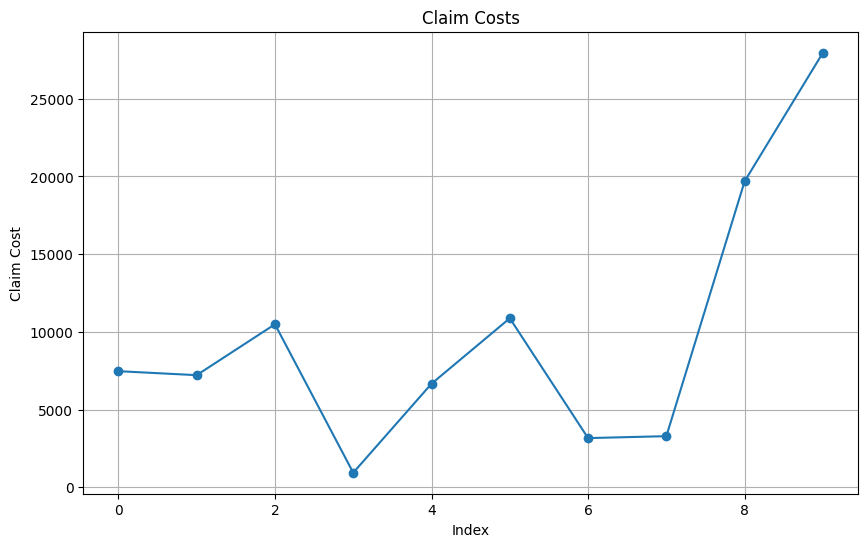

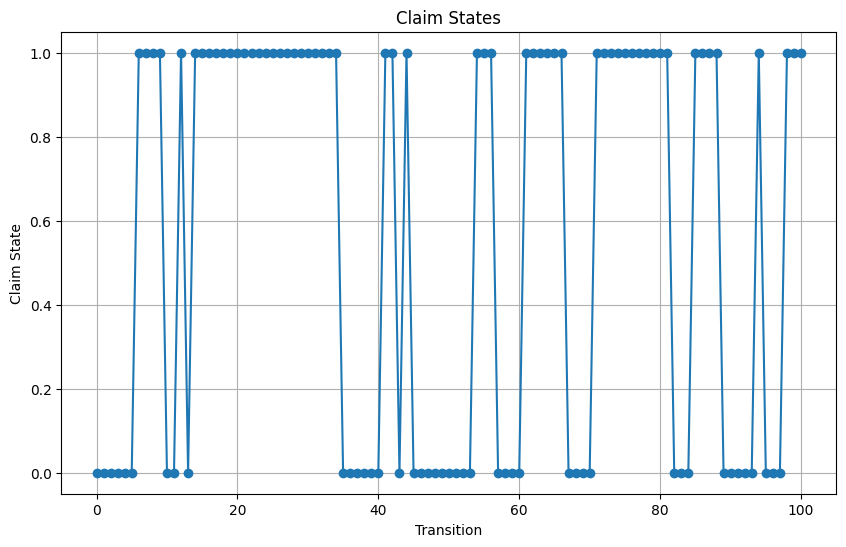

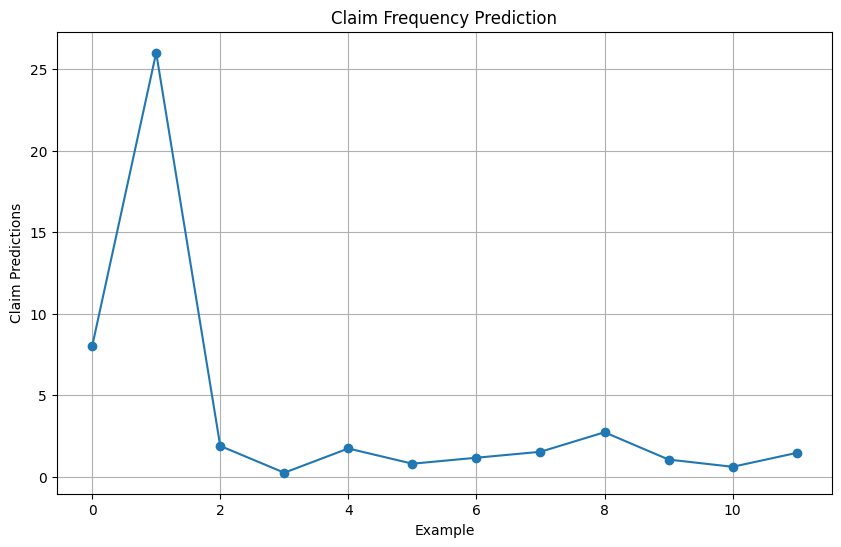

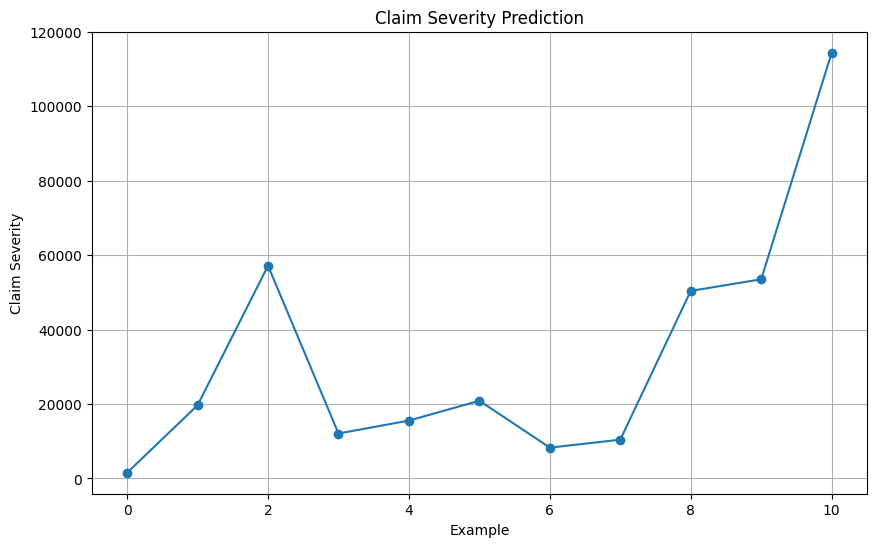

In [15]:
import matplotlib.pyplot as plt

# Claim Costs Line Graph
plt.figure(figsize=(10, 6))
plt.plot(range(10), claim_costs[:10], marker='o')
plt.xlabel('Index')
plt.ylabel('Claim Cost')
plt.title('Claim Costs')
plt.grid(True)
plt.show()

# Claim States Line Graph
plt.figure(figsize=(10, 6))
plt.plot(range(len(claim_states)), claim_states, marker='o')
plt.xlabel('Transition')
plt.ylabel('Claim State')
plt.title('Claim States')
plt.grid(True)
plt.show()

# Claim Frequency Examples Line Graph
claim_frequency_examples = [claim_frequency, claim_frequency_negative_binomial] + list(claim_frequency_generalized_poisson[:10])

plt.figure(figsize=(10, 6))
plt.plot(range(len(claim_frequency_examples)), claim_frequency_examples, marker='o')
plt.xlabel('Example')
plt.ylabel('Claim Predictions')
plt.title('Claim Frequency Prediction')
plt.grid(True)
plt.show()

# Claim Severity Examples Line Graph
claim_severity_examples = [claim_severity_gamma] + list(claim_severity_lognormal[:10])

plt.figure(figsize=(10, 6))
plt.plot(range(len(claim_severity_examples)), claim_severity_examples, marker='o')
plt.xlabel('Example')
plt.ylabel('Claim Severity')
plt.title('Claim Severity Prediction')
plt.grid(True)
plt.show()
